The goal of the homework is to obtain a visual representation of the evolution of the global surface temperature of the earth as a set of colored stripes. Here is an example

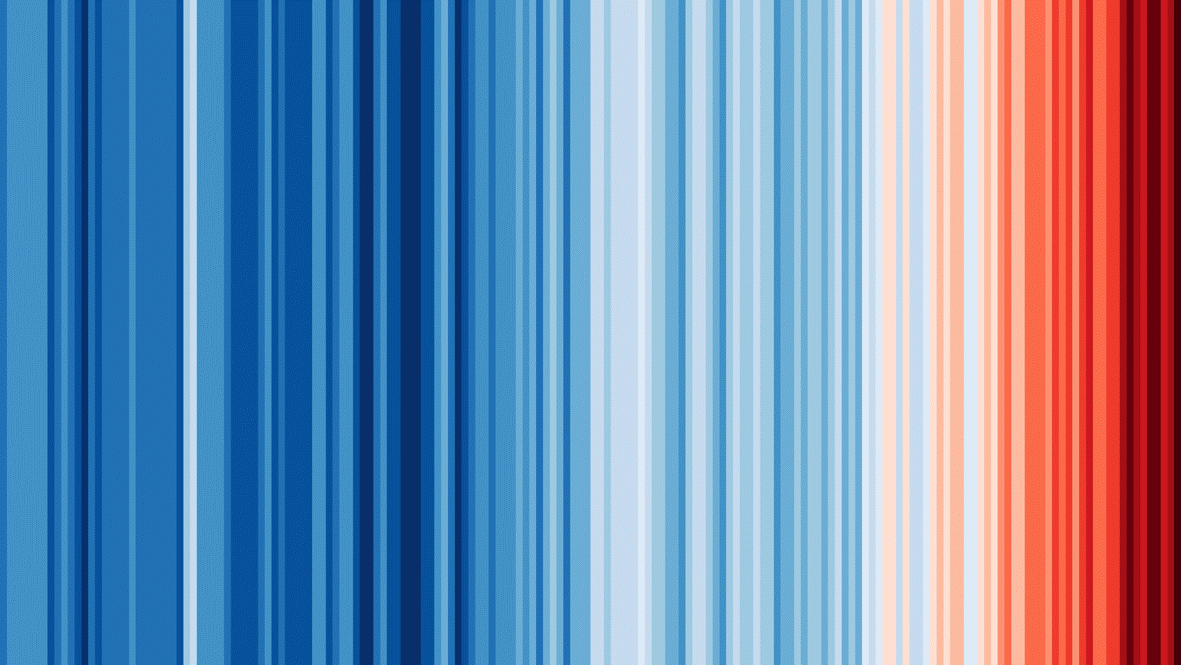

#### Administrativia
Groups composition to be provided no later than Thursday, Sep. 12, 8 PM (by email) \
Homework to be turned in Friday, Sep. 20, 10 PM (procedure TBA)

#### Data set
Two CSV files, NoMon.csv for the northern hemisphere, SoMon.csv for the southern hemisphere are deposited in the same directory as the notebook\
Column A is the  month, column B is the temperature anomaly in °C (difference between the world's average surface temperature for the month and the average surface temperature in 1961-1990.) Columns C and D are the lower and upper boundaries of the confidence interval and are not used here

In [12]:
# useful packages
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import csv

Load the two datasets and check that there is no missing or incorrect data

In [13]:
# verifying data
# load in the two datasets into dataframes
nomon = pd.read_csv("NoMon.csv")
somon = pd.read_csv("SoMon.csv")
# check if anything is missing in the first two columns
noNa = nomon.isna()[(nomon.isna()["Time"]==True) | (nomon.isna()["Anomaly (deg C)"]==True)]
soNa = somon.isna()[(somon.isna()["Time"]==True) | (somon.isna()["Anomaly (deg C)"]==True)]

# if no data is missing in the first two columns, write a message
# also, how does one check if data is "incorrect"? What does it mean?
if noNa.shape[0] == 0:
    print("No data missing for Northern Hemisphere")
if soNa.shape[0] == 0:
    print("No data missing for Southern Hemisphere") 

No data missing for Northern Hemisphere
No data missing for Southern Hemisphere


Combine the datasets by averaging months and hemispheres in order to obtain the global average temperature anomaly for each year from 1850 to 2023

In [14]:
# preparing data

#Converging the two hemispheres' data
# averaged dataframe should have exact same structure as the two others
allmon = nomon
# the "anomaly " column is changed to be equal to average of north and south hemisphers' "anomaly" columns.
allmon["Anomaly (deg C)"]=(nomon["Anomaly (deg C)"]+somon["Anomaly (deg C)"])/2
print(allmon.head(5))

      Time  Anomaly (deg C)  Lower confidence limit (2.5%)  \
0  1850-01        -0.674564                      -1.315763   
1  1850-02        -0.333416                      -0.710982   
2  1850-03        -0.591323                      -1.033967   
3  1850-04        -0.588721                      -1.059420   
4  1850-05        -0.508817                      -0.913435   

   Upper confidence limit (97.5%)  
0                       -0.485475  
1                        0.409553  
2                        0.027444  
3                       -0.287138  
4                       -0.303582  


In [15]:
#Adapting year-month global avg temp to yearly global average temperature from 1850 to 2023
allmon['Year'] = pd.to_datetime(allmon['Time'], format='%Y-%m').dt.year
allmon_yearly_avg = allmon.groupby('Year')['Anomaly (deg C)'].mean().reset_index()
allmon_yearly_avg.columns = ['Year', 'Anomaly (deg C)']

print(allmon_yearly_avg.head(5))

   Year  Anomaly (deg C)
0  1850        -0.417711
1  1851        -0.233350
2  1852        -0.229399
3  1853        -0.270354
4  1854        -0.291521


With some help from internet, design a color palette of ~20-30 colors, each color being a RGB code (e.g '#c4cbfc') where half of the colors are a gradient from dark blue to near-white blue and half the colors are a gradient from near-white red to dark red 
The palette will be a list, e.g. palette = \['#c4cbfc', '#ffffff', ... \]. This is an opportunity to express your inner artist.

In [16]:
# Creating the color palette gradient list:
palette = [
    # Gradient of blues:
    '#e7f5ff', '#ddf1ff', '#c2e6ff', '#a2d9ff', '#86c9f9', 
    '#6fbcf3', '#57adea', '#409fe2', '#2b8dd3', '#1d7ec3', 
    '#1371b4', '#0a619f', '#04538c', '#004373',
    
    #Gradient of reds:
    '#ffebeb', '#ffdfdf', '#ffc8c8', '#ffabab', '#f99a9a',
    '#f18181', '#eb6f6f', '#e55f5f', '#da4a4a', '#d03333',
    '#c22626', '#b51b1b', '#9f1010', '#830707']

#Note: These are HTML color codes.

Write a function which takes as input a temperature (float) and returns the color code (string) from the palette corresponding to the temperature's position between the min and max temperatures of the combined dataset

In [17]:
# Color code from temperature

#Defining the function:
def temp_to_color(temp, color_palette):
    
    #Splitting the palette
    number_colors = len(color_palette)
    splitting = number_colors // 2

    #Assigning color (string) from palette to temperature
    #Blue gradient for temperature below 0
    if temp < 0:
        normalized_temp = (temp + 1) / 1
        color_of_temp = int(normalized_temp * (splitting - 1))

    #Red gradient for temperature above 0
    else:
        normalized_temp = temp / 1
        color_of_temp = splitting + int(normalized_temp * (normalized_temp * (splitting - 1)))

    # Ensuring color_of_temp is within bounds of 0 to 27
    color_of_temp = max(0, min(color_of_temp, number_colors - 1))
    
    return color_palette[color_of_temp]

In [18]:
#Testing the function for all year_month data
allmon['Color'] = allmon['Anomaly (deg C)'].apply(lambda x: temp_to_color(x, palette))
print(allmon[['Time', 'Anomaly (deg C)', 'Color']].head())

      Time  Anomaly (deg C)    Color
0  1850-01        -0.674564  #86c9f9
1  1850-02        -0.333416  #2b8dd3
2  1850-03        -0.591323  #6fbcf3
3  1850-04        -0.588721  #6fbcf3
4  1850-05        -0.508817  #57adea


In [19]:
#Testing the function for all yearly data
allmon_yearly_avg['Color'] = allmon_yearly_avg['Anomaly (deg C)'].apply(lambda x: temp_to_color(x, palette))
print(allmon_yearly_avg[['Year', 'Anomaly (deg C)', 'Color']].head())

   Year  Anomaly (deg C)    Color
0  1850        -0.417711  #409fe2
1  1851        -0.233350  #1d7ec3
2  1852        -0.229399  #1371b4
3  1853        -0.270354  #1d7ec3
4  1854        -0.291521  #1d7ec3


In [20]:
#Saving as new files
#Done to double check that all the data was assigned a color (not very necessary)

#CSV file for year-month evaluation
allmon.to_csv('AllMon_with_C.csv', index = False)

#CSV file for yearly evaluation
allmon_yearly_avg.to_csv('AllMon_Yearly_with C.csv', index = False)

#Note: From double checking the new CSV file, there are Anomaly (deg C) which are greater than 1.
# This is ok, as they will simply be assigned the darkest red color in the palette instead.

using matplotlib, print the combined dataset (average temperature anomaly for each year) as a stripes representation.\
NOTE: it is OK to have the X and Y axis displayed. 

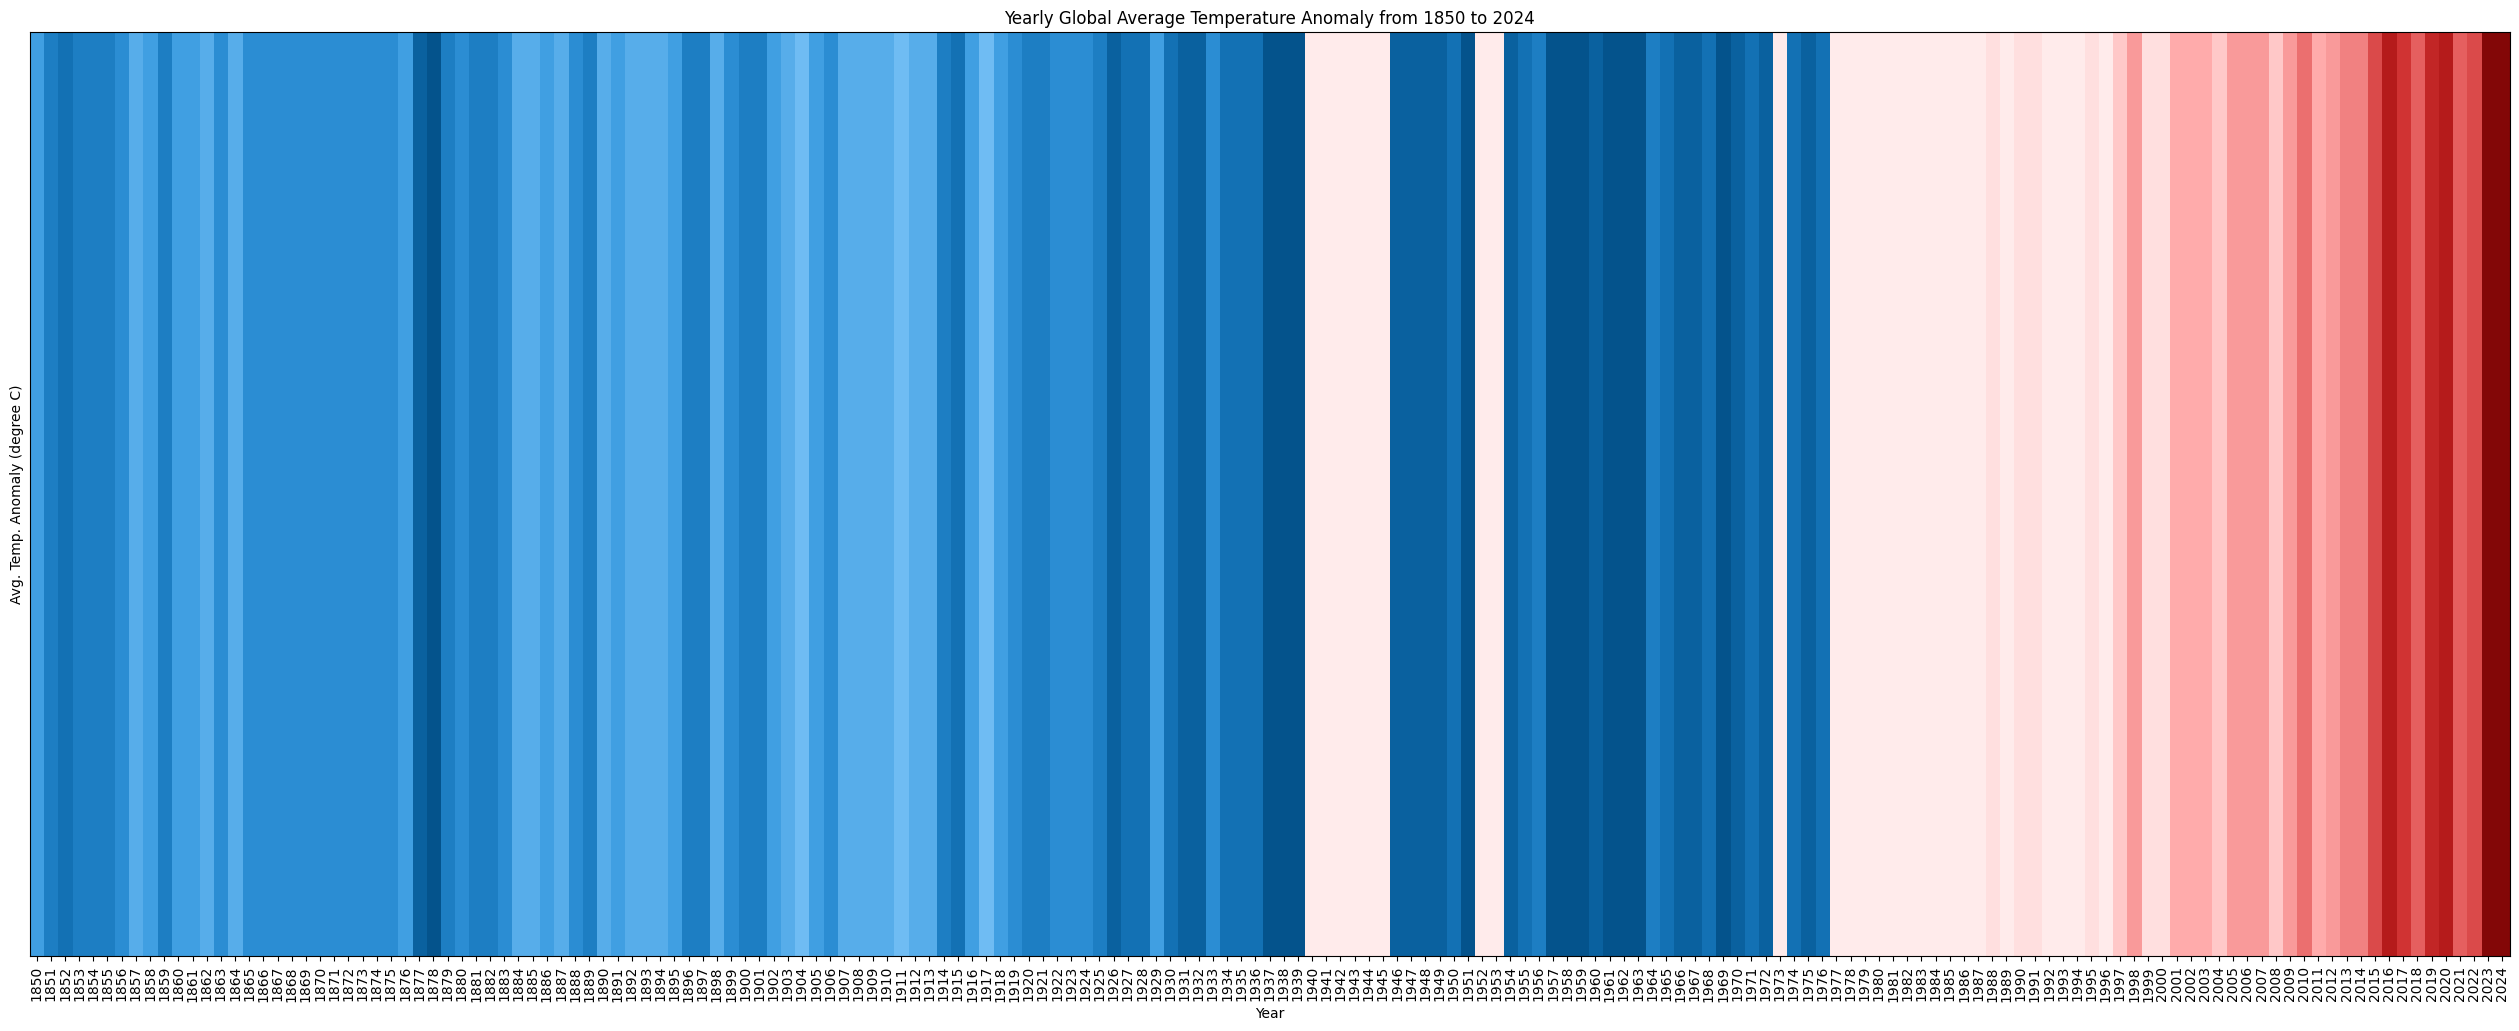

In [39]:
# plot stripes

#Function to convert hex to RGB
def hex_to_html(hex_html):
    return mcolors.hex2color(hex_html)

#This was done because the matplotlib imshow only sees in black and white.

#Converting hex to color
colors = np.array([hex_to_html(color) for color in allmon_yearly_avg['Color']]).reshape(1, -1, 3)

#Creating the plot
plt.figure(figsize = (32, 12))
plt.imshow(colors, aspect = 'auto', interpolation='none')

#Defining the plot details
plt.xlabel('Year')
plt.ylabel('Avg. Temp. Anomaly (degree C)')
plt.title('Yearly Global Average Temperature Anomaly from 1850 to 2024')

#Fixing axis labels
plt.xticks(ticks = np.arange(len(allmon_yearly_avg)), labels = allmon_yearly_avg['Year'], rotation = 90)
plt.yticks([])

plt.show()